In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

## データの読み込み

In [174]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_add = pd.read_csv('train_add.csv')
add_2014 = pd.read_csv('2014_add.csv')
stadium = pd.read_csv('stadium.csv')
condition = pd.read_csv('condition.csv')
condition_add = pd.read_csv('condition_add.csv')

In [175]:
display(stadium.head())

,name,address,capa
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000
1,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,フクダ電子アリーナ,千葉県千葉市中央区川崎町1-20,18500
3,日立柏サッカー場,千葉県柏市日立台1-2-50,15349
4,ニンジニアスタジアム,愛媛県松山市上野町乙46,15576


## データの結合

In [176]:
condition.shape

(2034, 31)

In [177]:
full_train = pd.concat([train, train_add])
full_condition = pd.concat([condition, condition_add])
print(train.shape, train_add.shape, full_train.shape)
print(condition.shape, condition_add.shape, full_condition.shape)

(1721, 11) (232, 11) (1953, 11)
(2034, 31) (270, 31) (2304, 31)


In [178]:
display(stadium.head(), full_train.head())

,name,address,capa
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000
1,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,フクダ電子アリーナ,千葉県千葉市中央区川崎町1-20,18500
3,日立柏サッカー場,千葉県柏市日立台1-2-50,15349
4,ニンジニアスタジアム,愛媛県松山市上野町乙46,15576


,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌


In [179]:
full_condition.head()

,id,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,...,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,1,0,屋内,12.4,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,...,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,2,3,晴一時雨,11.3,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,...,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,1,0,曇一時雨のち晴,11.4,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,...,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,0,0,屋内,22.5,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,...,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


In [180]:
# 結合する特徴量を選択
stadium = stadium.rename(columns={'name': 'stadium'})
stadium = stadium[['stadium','capa']]
full_condition = full_condition[['id', 'weather', 'temperature','humidity']]
display(stadium.head(), full_condition.head())

,stadium,capa
0,名古屋市瑞穂陸上競技場,20000
1,豊田スタジアム,40000
2,フクダ電子アリーナ,18500
3,日立柏サッカー場,15349
4,ニンジニアスタジアム,15576


,id,weather,temperature,humidity
0,13994,雨,3.8,66%
1,13995,屋内,12.4,43%
2,13996,晴一時雨,11.3,41%
3,13997,曇一時雨のち晴,11.4,52%
4,13998,屋内,22.5,32%


In [181]:
# 結合
full_train = pd.merge(full_train, stadium, on='stadium', how='left')

In [182]:
full_train = pd.merge(full_train, full_condition, on='id', how='left')

In [183]:
full_test = pd.merge(test, stadium, on='stadium', how='left')
full_test =pd.merge(full_test, full_condition, on='id', how='left')

In [184]:
display(full_train.head(), full_test.head())
print(full_train.shape, full_test.shape)

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,capa,weather,temperature,humidity
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,19694,雨,3.8,66%
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,40000,屋内,12.4,43%
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,21000,晴一時雨,11.3,41%
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,50000,曇一時雨のち晴,11.4,52%
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,39232,屋内,22.5,32%


,id,year,stage,match,gameday,time,home,away,stadium,tv,capa,weather,temperature,humidity
0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス,19694,晴,27.4,70%
1,15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス,40728,晴,30.8,65%
2,15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉,63700,晴,31.7,58%
3,15825,2014,Ｊ１,第１８節第１日,08/02(土),19:03,柏レイソル,川崎フロンターレ,日立柏サッカー場,スカパー！／スカパー！プレミアムサービス,15349,晴,29.3,76%
4,15827,2014,Ｊ１,第１８節第１日,08/02(土),19:03,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,スカパー！／スカパー！プレミアムサービス,42300,晴,30.4,68%


(1953, 15) (313, 14)


In [185]:
# 欠損値などの確認
full_test.isnull().sum()

id             0
year           0
stage          0
match          0
gameday        0
time           0
home           0
away           0
stadium        0
tv             0
capa           0
weather        0
temperature    0
humidity       0
dtype: int64

In [186]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           313 non-null    int64  
 1   year         313 non-null    int64  
 2   stage        313 non-null    object 
 3   match        313 non-null    object 
 4   gameday      313 non-null    object 
 5   time         313 non-null    object 
 6   home         313 non-null    object 
 7   away         313 non-null    object 
 8   stadium      313 non-null    object 
 9   tv           313 non-null    object 
 10  capa         313 non-null    int64  
 11  weather      313 non-null    object 
 12  temperature  313 non-null    float64
 13  humidity     313 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 34.4+ KB


## データの前処理

In [187]:
full_train.select_dtypes(include=object).head()

,stage,match,gameday,time,home,away,stadium,tv,weather,humidity
0,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,雨,66%
1,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,屋内,43%
2,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,晴一時雨,41%
3,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,曇一時雨のち晴,52%
4,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,屋内,32%


In [188]:
# matchの節をsectionとして数字で取り出す
full_train['section'] = full_train['match'].apply(lambda x: x.split('節')[0][1:]).astype(int)
full_test['section'] = full_test['match'].apply(lambda x: x.split('節')[0][1:]).astype(int)

In [189]:
# gamedayから月と曜日を取り出す
full_train['month'] = full_train['gameday'].apply(lambda x: x[:2]).astype(int)
full_train['weekday'] = full_train['gameday'].apply(lambda x: x[6])
full_test['month'] = full_test['gameday'].apply(lambda x: x[:2]).astype(int)
full_test['weekday'] = full_test['gameday'].apply(lambda x: x[6])

In [190]:
# timeから時間を取り出す
full_train['hour'] = full_train['time'].apply(lambda x: x.split(':')[0]).astype(int)
full_test['hour'] = full_test['time'].apply(lambda x: x.split(':')[0]).astype(int)

In [191]:
# tvからサービスの数をカウント
full_train['num_tv'] = full_train['tv'].apply(lambda x: len(x.split('／')))
full_test['num_tv'] = full_test['tv'].apply(lambda x: len(x.split('／')))

In [192]:
full_test['num_tv'][:5]

0    2
1    2
2    4
3    2
4    2
Name: num_tv, dtype: int64

In [193]:
# humidityから％を切り取り数値データに変換
full_train['humidity'] = full_train['humidity'].apply(lambda x: x.rstrip('%')).astype(int)
full_test['humidity'] = full_test['humidity'].apply(lambda x: x.rstrip('%')).astype(int)

In [194]:
# 完成したデータを確認
display(full_train.head(3), full_test.head(3))

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,capa,weather,temperature,humidity,section,month,weekday,hour,num_tv
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,19694,雨,3.8,66,1,3,土,14,4
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,40000,屋内,12.4,43,1,3,土,14,4
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,21000,晴一時雨,11.3,41,1,3,土,14,4


,id,year,stage,match,gameday,time,home,away,stadium,tv,capa,weather,temperature,humidity,section,month,weekday,hour,num_tv
0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス,19694,晴,27.4,70,18,8,土,19,2
1,15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス,40728,晴,30.8,65,18,8,土,18,2
2,15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉,63700,晴,31.7,58,18,8,土,19,4


In [195]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           313 non-null    int64  
 1   year         313 non-null    int64  
 2   stage        313 non-null    object 
 3   match        313 non-null    object 
 4   gameday      313 non-null    object 
 5   time         313 non-null    object 
 6   home         313 non-null    object 
 7   away         313 non-null    object 
 8   stadium      313 non-null    object 
 9   tv           313 non-null    object 
 10  capa         313 non-null    int64  
 11  weather      313 non-null    object 
 12  temperature  313 non-null    float64
 13  humidity     313 non-null    int32  
 14  section      313 non-null    int32  
 15  month        313 non-null    int32  
 16  weekday      313 non-null    object 
 17  hour         313 non-null    int32  
 18  num_tv       313 non-null    int64  
dtypes: float

In [196]:
full_train.describe()

,id,y,year,capa,temperature,humidity,section,month,hour,num_tv
count,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000
mean,15049.442396,10629.558116,2012.820276,25688.549411,20.438914,60.220174,18.050691,6.316948,16.310804,2.656938
std,646.260483,8102.315189,0.758124,14016.934408,6.438737,19.953138,11.153364,2.500493,2.310252,0.715085
min,13994.000000,0.000000,2012.000000,3560.000000,1.400000,12.000000,1.000000,3.000000,12.000000,1.000000
25%,14482.000000,4687.000000,2012.000000,15589.000000,15.800000,44.000000,9.000000,4.000000,14.000000,2.000000
50%,15044.000000,8594.000000,2013.000000,20246.000000,21.400000,63.000000,17.000000,6.000000,16.000000,3.000000
75%,15532.000000,13471.000000,2013.000000,30132.000000,25.600000,77.000000,27.000000,8.000000,19.000000,3.000000
max,16238.000000,62632.000000,2014.000000,72327.000000,34.200000,99.000000,42.000000,12.000000,20.000000,5.000000


In [197]:
full_train[full_train['y']==0].head(10)

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,capa,weather,temperature,humidity,section,month,weekday,hour,num_tv
1385,15699,0,2014,Ｊ１,第４節第１日,03/23(日),15:04,浦和レッズ,清水エスパルス,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉,63700,晴,16.2,23,4,3,日,15,3


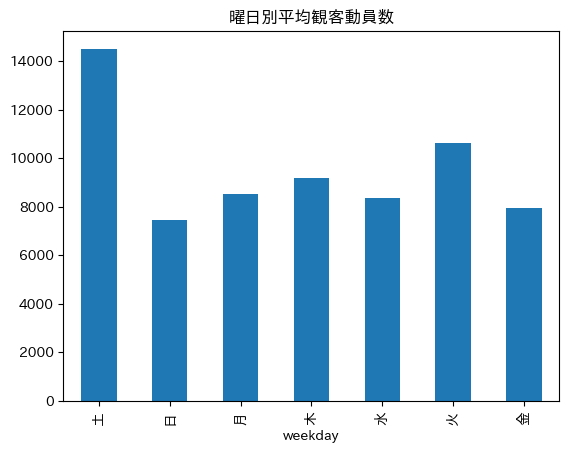

In [198]:
# 曜日別平均観客動員数
full_train.groupby('weekday')['y'].mean().plot.bar()
plt.title('曜日別平均観客動員数')
plt.show()

In [199]:
full_train['weekday'] = full_train['weekday'].apply(lambda x: 1 if x == '土' else 0)
full_test['weekday'] = full_test['weekday'].apply(lambda x: 1 if x == '土' else 0)

In [200]:
li = ['id', 'y', 'year', 'capa', 'temperature', 'humidity', 'section', 'month', 'weekday', 'hour', 'num_tv']
t_li = ['id', 'year', 'capa', 'temperature', 'humidity', 'section', 'month', 'weekday', 'hour', 'num_tv']

In [201]:
full_train[li].corr()

,id,y,year,capa,temperature,humidity,section,month,weekday,hour,num_tv
id,1.000000,-0.177472,0.942622,-0.109910,0.049774,-0.124472,-0.033102,-0.097780,-0.086122,-0.089310,-0.536583
y,-0.177472,1.000000,0.002161,0.684865,-0.027614,-0.099168,-0.043253,0.106658,0.408027,0.029472,0.141993
year,0.942622,0.002161,1.000000,0.016675,-0.041344,-0.197296,-0.259019,-0.260177,0.086305,-0.107319,-0.495561
capa,-0.109910,0.684865,0.016675,1.000000,-0.032150,-0.070578,-0.089631,0.004395,0.243377,0.020668,0.072130
temperature,0.049774,-0.027614,-0.041344,-0.032150,1.000000,0.193137,0.427555,0.381469,0.035762,0.366738,-0.093077
humidity,-0.124472,-0.099168,-0.197296,-0.070578,0.193137,1.000000,0.305774,0.296823,-0.018941,0.459679,0.003932
section,-0.033102,-0.043253,-0.259019,-0.089631,0.427555,0.305774,1.000000,0.957374,-0.140659,0.205105,-0.093525
month,-0.097780,0.106658,-0.260177,0.004395,0.381469,0.296823,0.957374,1.000000,-0.020391,0.219187,-0.072958
weekday,-0.086122,0.408027,0.086305,0.243377,0.035762,-0.018941,-0.140659,-0.020391,1.000000,0.044843,0.054650
hour,-0.089310,0.029472,-0.107319,0.020668,0.366738,0.459679,0.205105,0.219187,0.044843,1.000000,-0.103810


In [202]:
# 無観客試合のデータを削除
full_train.drop(index=1385, inplace=True)

In [203]:
full_train[full_train['y']==0]

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,capa,weather,temperature,humidity,section,month,weekday,hour,num_tv


In [204]:
trim_train = full_train[li]

In [205]:
trim_test = full_test[t_li]

In [206]:
trim_train.corr()['y']

id            -0.176920
y              1.000000
year           0.003211
capa           0.688290
temperature   -0.028072
humidity      -0.100557
section       -0.044138
month          0.105861
weekday        0.407708
hour           0.029106
num_tv         0.142387
Name: y, dtype: float64

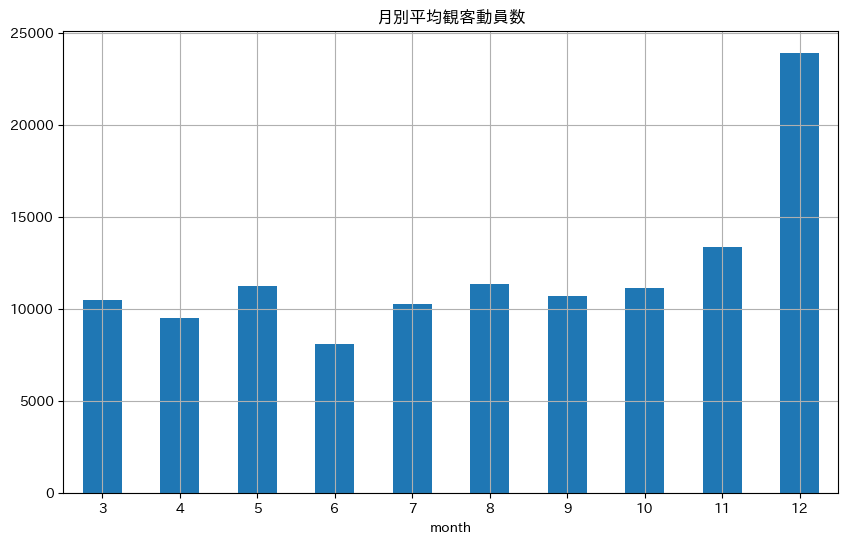

In [207]:
# monthごとのyの平均の分布
plt.figure(figsize=(10,6))
trim_train.groupby('month')['y'].mean().plot.bar()
plt.grid()
plt.xticks(rotation = 0)
plt.title('月別平均観客動員数')
plt.show()

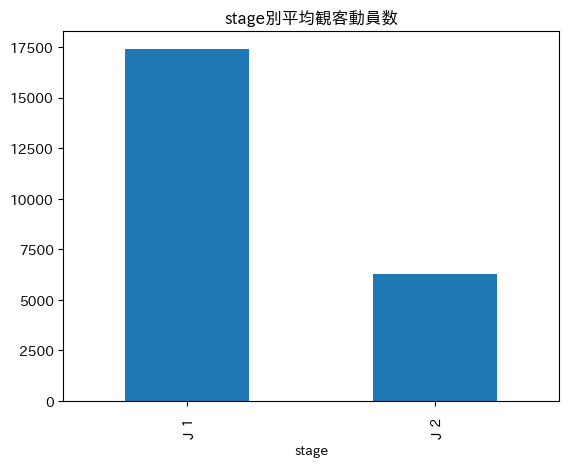

In [208]:
# stage別平均観客動員数
full_train.groupby('stage')['y'].mean().plot.bar()
plt.title('stage別平均観客動員数')
plt.show()

## 学習・評価

In [209]:
full_train.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'capa', 'weather', 'temperature', 'humidity',
       'section', 'month', 'weekday', 'hour', 'num_tv'],
      dtype='object')

In [230]:
# 学習に使用する特徴量の選択
use_columns = ['stage', 'capa', 'month', 'weekday', 'num_tv', 'section', 'hour']
y = full_train['y']
train = full_train[use_columns]
test = full_test[use_columns]

In [231]:
# カテゴリ変数のダミー変数化
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [232]:
test.head(10)

,capa,month,weekday,num_tv,section,hour,stage_Ｊ２
0,19694,8,1,2,18,19,False
1,40728,8,1,2,18,18,False
2,63700,8,1,4,18,19,False
3,15349,8,1,2,18,19,False
4,42300,8,1,2,18,19,False
5,21000,8,1,2,18,18,False
6,19637,8,1,2,18,18,False
7,24490,8,1,2,18,19,False
8,15600,8,1,3,19,19,False
9,26530,8,1,2,19,19,False


In [244]:
# trainを学習データと検証データに分割
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=82)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(1561, 7) (391, 7) (1561,) (391,)


In [245]:
# モデル学習
rfr = RandomForestRegressor(random_state=82)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=82)

In [246]:
# 予測・精度評価
y_pred_train = rfr.predict(X_train)
rmse_train = np.sqrt(MSE(y_train, y_pred_train))

y_pred_val = rfr.predict(X_val)
rmse_val = np.sqrt(MSE(y_val, y_pred_val))

print(f'学習データの予測精度： {rmse_train}')
print(f'検証データの予測精度： {rmse_val}')


学習データの予測精度： 1428.2555467623793
検証データの予測精度： 3754.9745562441876


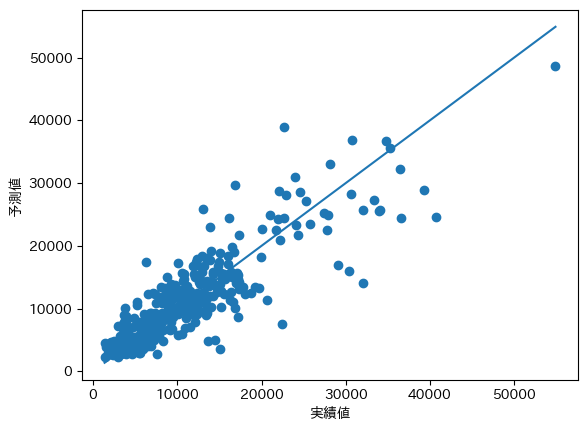

In [247]:
# 予測の可視化
plt.scatter(y_val, y_pred_val)
min_value = min(y_val.min(), y_pred_val.min())
max_value = max(y_val.max(), y_pred_val.max())
plt.plot([min_value, max_value],[min_value, max_value])
plt.xlabel('実績値')
plt.ylabel('予測値')
plt.show()

## 予測・結果の提出

In [264]:
# 予測
predict = rfr.predict(test)
predict = np.round(predict, decimals=7)
predict[:5]

array([14766.26, 17062.45, 34900.21, 10378.71, 24340.4 ])

In [265]:
# sample_submitの読み込み
submit = pd.read_csv('sample_submit.csv', header=None)
submit.head()

,0,1
0,15822,10662.395119
1,15823,10662.395119
2,15824,10662.395119
3,15825,10662.395119
4,15827,10662.395119


In [266]:
submit[1] = predict

In [267]:
submit.head()

,0,1
0,15822,14766.26
1,15823,17062.45
2,15824,34900.21
3,15825,10378.71
4,15827,24340.40


In [268]:
submit.shape

(313, 2)

In [269]:
submit.to_csv('submit.csv', index=False, header=None)